<h2><a href="https://leetcode.com/problems/critical-connections-in-a-network">1192. Critical Connections in a Network</a></h2><h3>Hard</h3><hr><p>There are <code>n</code> servers numbered from <code>0</code> to <code>n - 1</code> connected by undirected server-to-server <code>connections</code> forming a network where <code>connections[i] = [a<sub>i</sub>, b<sub>i</sub>]</code> represents a connection between servers <code>a<sub>i</sub></code> and <code>b<sub>i</sub></code>. Any server can reach other servers directly or indirectly through the network.</p>

<p>A <em>critical connection</em> is a connection that, if removed, will make some servers unable to reach some other server.</p>

<p>Return all critical connections in the network in any order.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2019/09/03/1537_ex1_2.png" style="width: 198px; height: 248px;" />
<pre>
<strong>Input:</strong> n = 4, connections = [[0,1],[1,2],[2,0],[1,3]]
<strong>Output:</strong> [[1,3]]
<strong>Explanation:</strong> [[3,1]] is also accepted.
</pre>

<p><strong class="example">Example 2:</strong></p>

<pre>
<strong>Input:</strong> n = 2, connections = [[0,1]]
<strong>Output:</strong> [[0,1]]
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>2 &lt;= n &lt;= 10<sup>5</sup></code></li>
	<li><code>n - 1 &lt;= connections.length &lt;= 10<sup>5</sup></code></li>
	<li><code>0 &lt;= a<sub>i</sub>, b<sub>i</sub> &lt;= n - 1</code></li>
	<li><code>a<sub>i</sub> != b<sub>i</sub></code></li>
	<li>There are no repeated connections.</li>
</ul>


## Tarjan's Algorithm
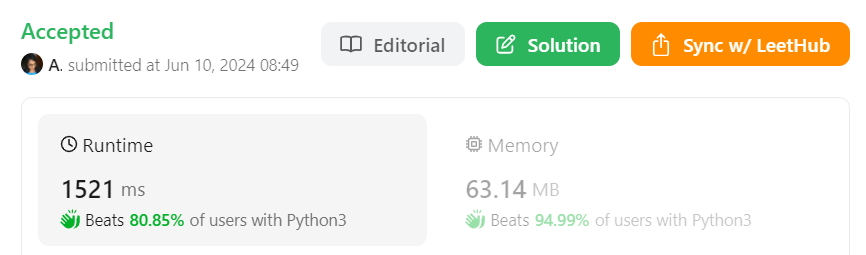

In [1]:
from typing import List

class Solution:
    def __init__(self):
        self.timer = 1

    def dfs(self, node, parent, adj, vis, tin, low, bridges):
        vis[node] = True
        tin[node] = low[node] = self.timer
        self.timer += 1
        for it in adj[node]:
            if it == parent:
                continue
            if not vis[it]:
                self.dfs(it, node, adj, vis, tin, low, bridges)
                low[node] = min(low[node], low[it])
                if low[it] > tin[node]:
                    bridges.append([it, node])
            else:
                low[node] = min(low[node], low[it])



    def criticalConnections(self, n: int, connections: List[List[int]]) -> List[List[int]]:
        adj = [[] for _ in range(n)]
        for u, v in connections:
            adj[u].append(v)
            adj[v].append(u)

        vis = [False]*n
        tin = [0]* n
        low = [0] * n
        bridges = []
        self.dfs(0, -1, adj, vis, tin, low, bridges)
        return bridges
        


n = 4
connections = [[0, 1], [1, 2], [2, 0], [1, 3]]
obj = Solution()
bridges = obj.criticalConnections(n, connections)
for it in bridges:
    print("[", it[0], ", ", it[1], "] ", end="")
print()

[ 3 ,  1 ] 
